In [1]:
# Import required libraries
import pandas as pd
from sklearn.metrics import roc_curve, auc, plot_roc_curve, roc_auc_score, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegressionCV
import numpy as np
import matplotlib.pyplot as plt

# Import the functions from the Logistic Regression Functions.py file
from logistic_regression_functions import *

In [2]:
random_seed = 51

In [3]:
# Load in the datasets
data_with_ages = pd.read_csv('Data/all_data_with_ages.csv')

# Load in the edges file and exclusions file
edges = pd.read_csv('Data/edges.csv')
exclusions = pd.read_csv('Data/exclusions.csv')
exclusion_list = exclusions['Base Code'].to_list()

E11 Modeling Example

0.7932993192317468
Area Under Curve: 0.8771678211376668


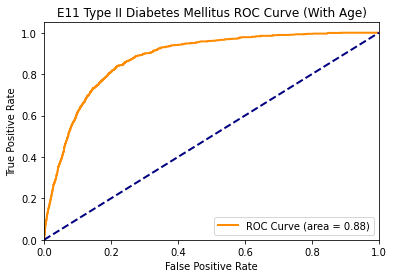

In [4]:
# E11 (Type II Diabetes Mellitus)
e11_model, e11_accuracy, e11_edge_df, e11_data_dict = gen_log_reg_model(data_with_ages, 'E11', edges, exclusion_list, random_seed = random_seed)

print(e11_accuracy)

e11_auc = roc_auc_score(e11_data_dict['y_test'],e11_model.predict_proba(e11_data_dict['X_test'])[:,1])

print('Area Under Curve: ' + str(e11_auc))

# Plotting the ROC Curve
e11_fpr, e11_tpr, _ = roc_curve(e11_data_dict['y_test'], e11_model.predict_proba(e11_data_dict['X_test'])[:,1])

plt.figure()
lw = 2
plt.plot(e11_fpr, e11_tpr, color = 'darkorange', lw=lw, label = 'ROC Curve (area = %0.2f)' % e11_auc)
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('E11 Type II Diabetes Mellitus ROC Curve (With Age)')
plt.legend(loc='lower right')
plt.show()

C:\Users\sarfu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


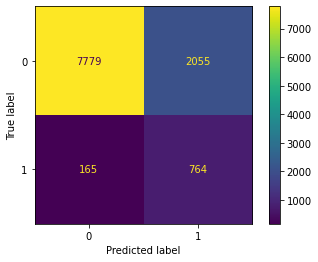

In [5]:
# Plot the E11 Confusion Matrix
plot_confusion_matrix(e11_model, e11_data_dict['X_test'], e11_data_dict['y_test'])
plt.show()